# ANALYSIS OF CUSTOMER PURCHASE BEHAVIOUR FOR A CHAIN OF HYPERMARKETS 

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

# BUSINESS PROBLEM

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

# DATASET

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
data = pd.read_csv("walmart_data.csv")

In [4]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [5]:
data.shape

(550068, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [7]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [8]:
data.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

There are no null values in the data.

# ANALYSING BASIC METRICS

# User_ID

In [9]:
data["User_ID"].value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

In [10]:
data["User_ID"].nunique()

5891

There are 5891 Unique User_ID

# Product_ID

In [11]:
data["Product_ID"].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

In [12]:
data["Product_ID"].nunique()

3631

There are 3631 Unique products

# Gender

In [13]:
data["Gender"].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

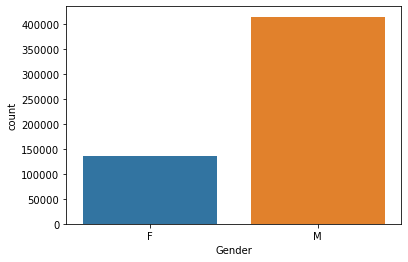

In [14]:
sns.countplot(x = data["Gender"])
plt.show()

In [15]:
(round(len(data[data["Gender"] == "M"])/len(data),2))

0.75

In [16]:
(round(len(data[data["Gender"] == "F"])/len(data),2))

0.25

# Age

In [17]:
data["Age"].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

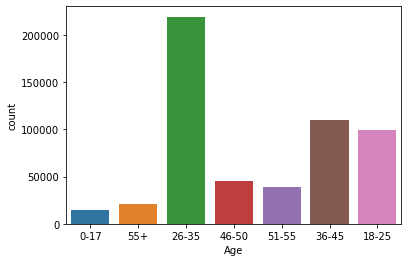

In [18]:
sns.countplot(x=data["Age"])
plt.show()

# Occupation

In [19]:
data["Occupation"].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

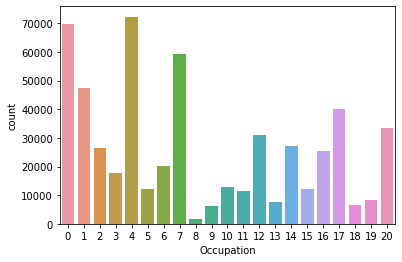

In [20]:
sns.countplot(x = data["Occupation"])
plt.show()

# City_Category

In [21]:
data["City_Category"].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

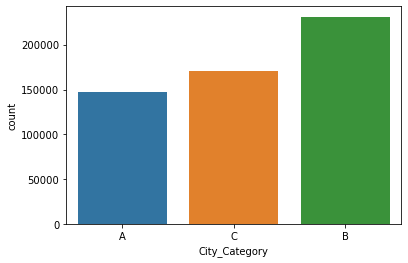

In [22]:
sns.countplot(x = data["City_Category"])
plt.show()

# Stay_In_Current_City_Years

In [23]:
data["Stay_In_Current_City_Years"].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

[]

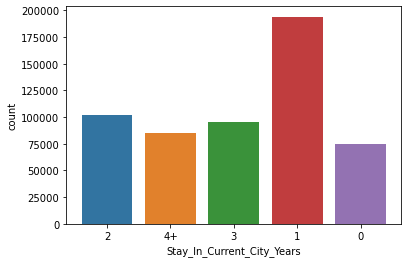

In [24]:
sns.countplot(x = data["Stay_In_Current_City_Years"])
plt.plot()

# Marital_Status

In [25]:
data["Marital_Status"].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

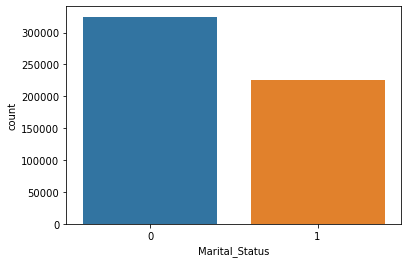

In [26]:
sns.countplot(x = data["Marital_Status"])
plt.show()

# Product_Category

In [27]:
data["Product_Category"].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

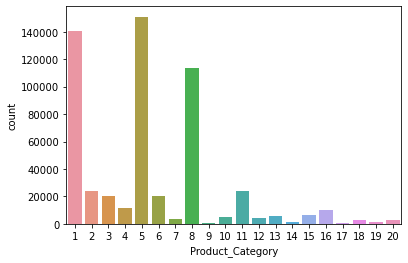

In [28]:
sns.countplot(x = data["Product_Category"])
plt.show()

# Purchase

In [29]:
data["Purchase"].value_counts()

7011     191
7193     188
6855     187
6891     184
7012     183
        ... 
23491      1
18345      1
3372       1
855        1
21489      1
Name: Purchase, Length: 18105, dtype: int64

In [30]:
data["Purchase"].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

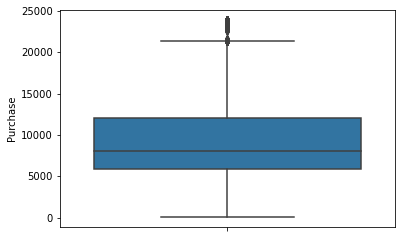

In [31]:
sns.boxplot(y = data["Purchase"])
plt.show()

# NON GRAPHICAL AND VISUAL ANALYSIS

# Analysing amount spent per transaction by male customer

In [91]:
data_male = data[data["Gender"]=="M"]

In [71]:
mean_male = data_male["Purchase"].mean()
mean_male

9437.526040472265

In [72]:
std_male = data_male["Purchase"].std()
std_male

5092.186209777949

<AxesSubplot:ylabel='Count'>

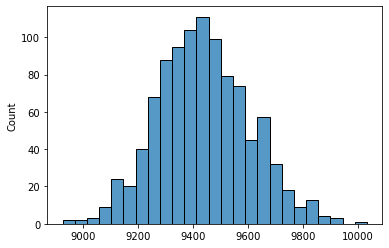

In [73]:
num_samples = 1000
collect_sample_means = []
for i in range(1000):
    sample_mean = data_male["Purchase"].sample(num_samples).mean()
    collect_sample_means.append(sample_mean)
sns.histplot(collect_sample_means)

# Confidence interval 95%

In [74]:
norm.ppf(0.975)

1.959963984540054

In [75]:
norm.ppf(0.025)

-1.9599639845400545

In [76]:
left_1 = mean_male - 1.96 * std_male / np.sqrt(num_samples)
left_1

9121.909069297339

In [77]:
right_1 = mean_male + 1.96 * std_male / np.sqrt(num_samples)
right_1

9753.143011647191

95% confidence that the sample mean for male customers is in 9121.909069297339, 9121.909069297339

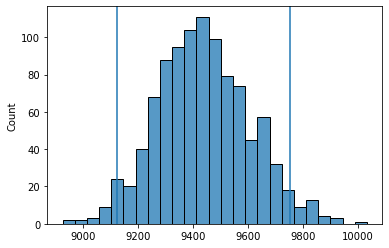

In [78]:
fig, ax = plt.subplots()
sns.histplot(collect_sample_means)
plt.axvline(left_1)
plt.axvline(right_1)

# Confidence interval 90%

In [79]:
norm.ppf(0.9)

1.2815515655446004

In [80]:
norm.ppf(0.05)

-1.6448536269514729

In [81]:
left_2 = mean_male - 1.644 * std_male / np.sqrt(num_samples)
left_2

9172.79425444595

In [82]:
right_2 = mean_male + 1.281 * std_male / np.sqrt(num_samples)
right_2

9643.80427520445

90% confidence that the sample mean for male customers is in 9172.79425444595, 9643.80427520445

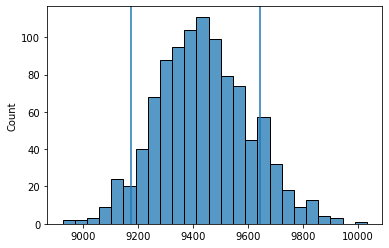

In [83]:
fig, ax = plt.subplots()
sns.histplot(collect_sample_means)
plt.axvline(left_2)
plt.axvline(right_2)

# Confidence interval 99%

In [84]:
norm.ppf(0.99)

2.3263478740408408

In [85]:
norm.ppf(0.005)

-2.575829303548901

In [86]:
left_3 = mean_male - 2.575 * std_male / np.sqrt(num_samples)
left_3

9022.87619313786

In [87]:
right_3 = mean_male + 2.326 * std_male / np.sqrt(num_samples)
right_3

9812.079650142101

99% confidence that the sample mean for male customers is in 9022.87619313786, 9812.079650142101

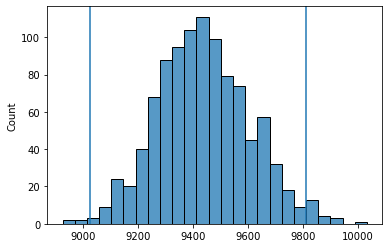

In [88]:
fig, ax = plt.subplots()
sns.histplot(collect_sample_means)
plt.axvline(left_3)
plt.axvline(right_3)

# Analysing amount spent per transaction by female customer

In [90]:
data_female = data[data["Gender"]=="F"]

In [93]:
mean_female = data_female["Purchase"].mean()
mean_female

8734.565765155476

In [94]:
std_female = data_female["Purchase"].std()
std_female

4767.233289291444

<AxesSubplot:ylabel='Count'>

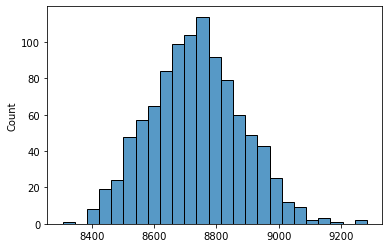

In [95]:
num_samples = 1000
collect_sample_means = []
for i in range(1000):
    sample_mean = data_female["Purchase"].sample(num_samples).mean()
    collect_sample_means.append(sample_mean)
sns.histplot(collect_sample_means)

# Confidence interval 95%

In [96]:
left_1f = mean_female - 1.96 * std_female / np.sqrt(num_samples)
left_1f

8439.089584657344

In [97]:
right_1f = mean_female + 1.96 * std_female / np.sqrt(num_samples)
right_1f

9030.041945653607

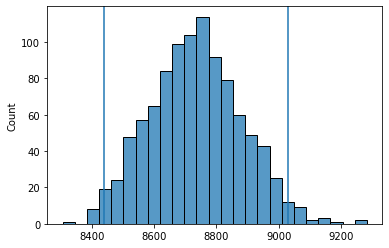

In [98]:
fig, ax = plt.subplots()
sns.histplot(collect_sample_means)
plt.axvline(left_1f)
plt.axvline(right_1f)

95% confidence that the sample mean for female customers is in 8439.089584657344, 9030.041945653607

# Confidence interval 90%

In [99]:
left_2f = mean_female - 1.644 * std_female / np.sqrt(num_samples)
left_2f

8486.727581105002

In [100]:
right_2f = mean_female + 1.281 * std_female / np.sqrt(num_samples)
right_2f

8927.68055455247

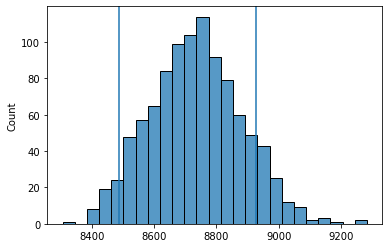

In [101]:
fig, ax = plt.subplots()
sns.histplot(collect_sample_means)
plt.axvline(left_2f)
plt.axvline(right_2f)

90% confidence that the sample mean for female customers is in 8486.727581105002, 8927.68055455247

# Confidence interval 99%

In [102]:
left_3f = mean_female - 2.575 * std_female / np.sqrt(num_samples)
left_3f

8346.376395368388

In [103]:
right_3f = mean_female + 2.326 * std_female / np.sqrt(num_samples)
right_3f

9085.217599767035

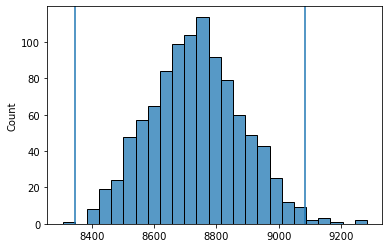

In [104]:
fig, ax = plt.subplots()
sns.histplot(collect_sample_means)
plt.axvline(left_3f)
plt.axvline(right_3f)

99% confidence that the sample mean for female customers is in 8346.376395368388, 8346.376395368388

# Analysing amount spent per transaction by married customer

In [105]:
data_married = data[data["Marital_Status"] == 1]

In [106]:
mean_married = data_married["Purchase"].mean()
mean_married

9261.174574082374

In [107]:
std_married = data_married["Purchase"].std()
std_married

5016.89737779313

<AxesSubplot:ylabel='Count'>

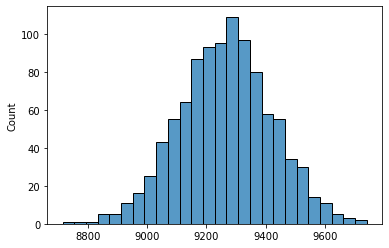

In [108]:
num_samples = 1000
collect_sample_means = []
for i in range(1000):
    sample_mean = data_married["Purchase"].sample(num_samples).mean()
    collect_sample_means.append(sample_mean)
sns.histplot(collect_sample_means)

# Confidence interval 95%

In [109]:
left_1ma = mean_married - 1.96 * std_married / np.sqrt(num_samples)
left_1ma

8950.224053059785

In [111]:
right_1ma = mean_married + 1.96 * std_married / np.sqrt(num_samples)
right_1ma

9572.125095104962

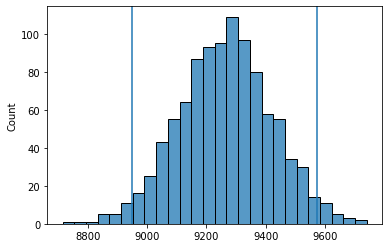

In [112]:
fig, ax = plt.subplots()
sns.histplot(collect_sample_means)
plt.axvline(left_1ma)
plt.axvline(right_1ma)

95% confidence that the sample mean for married customers is in 8950.224053059785, 9572.125095104962

# Analysing amount spent per transaction by unmarried customer

In [113]:
data_unmarried = data[data["Marital_Status"] == 0] 

In [115]:
mean_unmarried = data_unmarried["Purchase"].mean()
mean_unmarried

9265.907618921507

In [117]:
std_unmarried = data_unmarried["Purchase"].std()
std_unmarried

5027.347858674457

<AxesSubplot:ylabel='Count'>

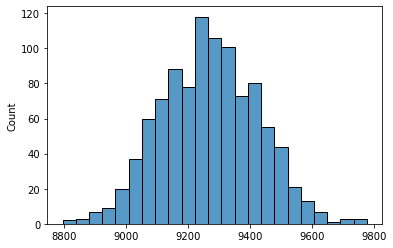

In [118]:
num_samples = 1000
collect_sample_means = []
for i in range(1000):
    sample_mean = data_unmarried["Purchase"].sample(num_samples).mean()
    collect_sample_means.append(sample_mean)
sns.histplot(collect_sample_means)

# Confidence interval 95%

In [119]:
left_1um = mean_unmarried - 1.96 * std_unmarried / np.sqrt(num_samples)
left_1um

8954.309370383227

In [120]:
right_1um = mean_unmarried + 1.96 * std_unmarried / np.sqrt(num_samples)
right_1um

9577.505867459786

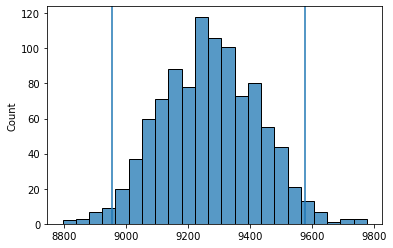

In [121]:
fig, ax = plt.subplots()
sns.histplot(collect_sample_means)
plt.axvline(left_1um)
plt.axvline(right_1um)

95% confidence that the sample mean for unmarried customers is in 8954.309370383227, 9577.505867459786

# Analysing amount spent per transaction by customer age 0-17

In [126]:
data_age_b17 = data[data["Age"] == "0-17"]

In [129]:
mean_b17 = data_age_b17["Purchase"].mean()
mean_b17

8933.464640444974

In [130]:
std_b17 = data_age_b17["Purchase"].std()
std_b17

5111.11404600277

<AxesSubplot:ylabel='Count'>

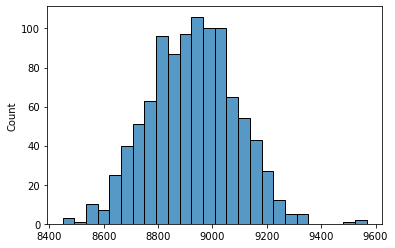

In [131]:
num_samples = 1000
collect_sample_means = []
for i in range(1000):
    sample_mean = data_age_b17["Purchase"].sample(num_samples).mean()
    collect_sample_means.append(sample_mean)
sns.histplot(collect_sample_means)

# Confidence interval 95%

In [134]:
left_b17 = mean_b17 - 1.96 * std_b17 / np.sqrt(num_samples)
left_b17

8616.674509826526

In [135]:
right_b17 = mean_b17 + 1.96 * std_b17 / np.sqrt(num_samples)
right_b17

9250.254771063423

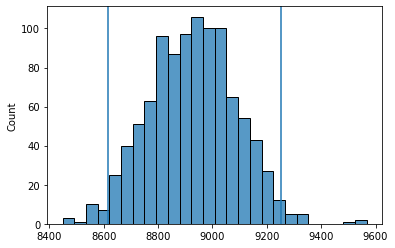

In [136]:
fig, ax = plt.subplots()
sns.histplot(collect_sample_means)
plt.axvline(left_b17)
plt.axvline(right_b17)

95% confidence that the sample mean for customers below age 17 is in 8616.674509826526, 9250.254771063423

# Analysing amount spent per transaction by customer age 18-25

In [137]:
data_age_1825 = data[data["Age"] == "18-25"]

In [140]:
mean_1825 = data_age_1825["Purchase"].mean()
mean_1825

9169.663606261289

In [141]:
std_1825 = data_age_1825["Purchase"].std()
std_1825

5034.321997176577

<AxesSubplot:ylabel='Count'>

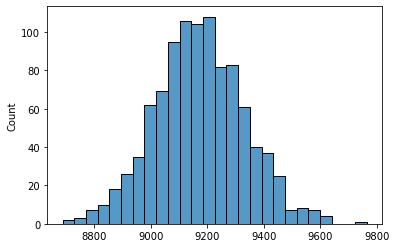

In [142]:
num_samples = 1000
collect_sample_means = []
for i in range(1000):
    sample_mean = data_age_1825["Purchase"].sample(num_samples).mean()
    collect_sample_means.append(sample_mean)
sns.histplot(collect_sample_means)

# Confidence interval 95%

In [143]:
left_1825 = mean_1825 - 1.96 * std_1825 / np.sqrt(num_samples)
left_1825

8857.63309614028

In [144]:
right_1825 = mean_1825 + 1.96 * std_1825 / np.sqrt(num_samples)
right_1825

9481.694116382298

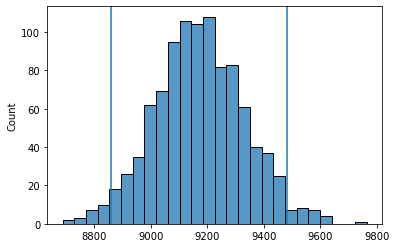

In [145]:
fig, ax = plt.subplots()
sns.histplot(collect_sample_means)
plt.axvline(left_1825)
plt.axvline(right_1825)

95% confidence that the sample mean for customers age between 18 and 25 is in 8857.63309614028, 9481.694116382298

# Analysing amount spent per transaction by customer age 26-35 

In [148]:
data_age_2635 = data[data["Age"] == "26-35"]

In [150]:
mean_2635 = data_age_2635["Purchase"].mean()
mean_2635

9252.690632869888

In [151]:
std_2635 = data_age_2635["Purchase"].std()
std_2635

5010.527303002927

<AxesSubplot:ylabel='Count'>

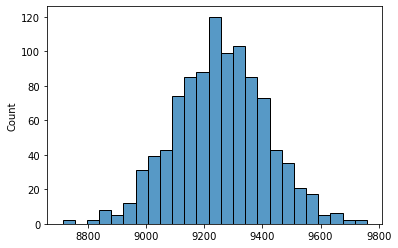

In [152]:
num_samples = 1000
collect_sample_means = []
for i in range(1000):
    sample_mean = data_age_2635["Purchase"].sample(num_samples).mean()
    collect_sample_means.append(sample_mean)
sns.histplot(collect_sample_means)

# Confidence interval 95%

In [153]:
left_2635 = mean_2635 - 1.96 * std_2635 / np.sqrt(num_samples)
left_2635

8942.13493317327

In [154]:
right_2635 = mean_2635 + 1.96 * std_2635 / np.sqrt(num_samples)
right_2635

9563.246332566505

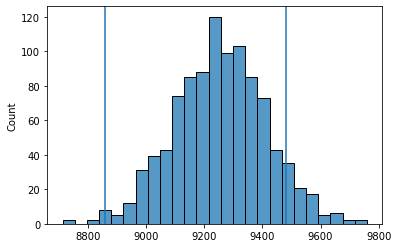

In [155]:
fig, ax = plt.subplots()
sns.histplot(collect_sample_means)
plt.axvline(left_1825)
plt.axvline(right_1825)

95% confidence that the sample mean for customers age between 26 and 35 is in 8942.13493317327, 9563.246332566505

# Analysing amount spent per transaction by customer age 36-50

In [175]:
data_age_3650 = data[(data["Age"] == "36-45") |  (data["Age"] == "46-50")]

In [177]:
mean_3650 = data_age_3650["Purchase"].mean()
mean_3650

9295.331742810537

In [178]:
std_3650 = data_age_3650["Purchase"].std()
std_3650

5006.934323562506

<AxesSubplot:ylabel='Count'>

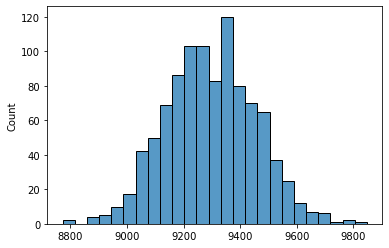

In [179]:
num_samples = 1000
collect_sample_means = []
for i in range(1000):
    sample_mean = data_age_3650["Purchase"].sample(num_samples).mean()
    collect_sample_means.append(sample_mean)
sns.histplot(collect_sample_means)

# Confidence interval 95%

In [181]:
left_3650 = mean_3650 - 1.96 * std_3650 / np.sqrt(num_samples)
left_3650

8984.99873828683

In [182]:
right_3650 = mean_3650 + 1.96 * std_3650 / np.sqrt(num_samples)
right_3650

9605.664747334244

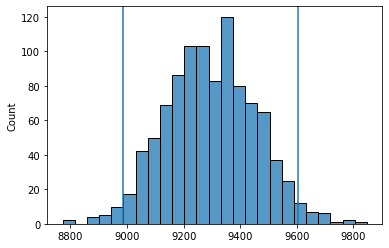

In [183]:
fig, ax = plt.subplots()
sns.histplot(collect_sample_means)
plt.axvline(left_3650)
plt.axvline(right_3650)

95% confidence that the sample mean for customers age between 26 and 35 is in 8984.99873828683, 9605.664747334244

# Analysing amount spent per transaction by customer age above 51

In [184]:
data_age_a51 = data[(data["Age"] == "51-55") | (data["Age"] == "55+")]

In [186]:
mean_a51 = data_age_a51["Purchase"].mean()
mean_a51

9463.661678193484

In [187]:
std_a51 = data_age_a51["Purchase"].std()
std_a51

5061.161476125099

<AxesSubplot:ylabel='Count'>

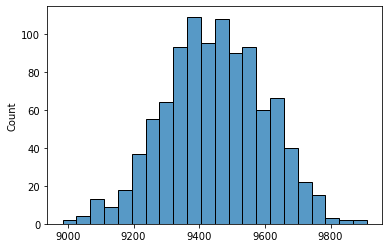

In [188]:
num_samples = 1000
collect_sample_means = []
for i in range(1000):
    sample_mean = data_age_a51["Purchase"].sample(num_samples).mean()
    collect_sample_means.append(sample_mean)
sns.histplot(collect_sample_means)

# Confidence interval 95%

In [189]:
left_a51 = mean_a51 - 1.96 * std_a51 / np.sqrt(num_samples)
left_a51

9149.967639932562

In [190]:
right_a51 = mean_a51 + 1.96 * std_a51 / np.sqrt(num_samples)
right_a51

9777.355716454407

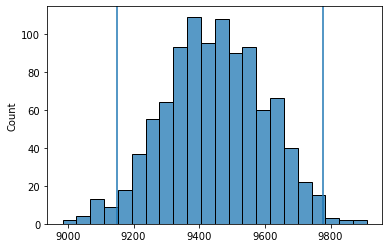

In [191]:
fig, ax = plt.subplots()
sns.histplot(collect_sample_means)
plt.axvline(left_a51)
plt.axvline(right_a51)

95% confidence that the sample mean for customers age between 26 and 35 is in 9149.967639932562, 9777.355716454407

# INSIGHTS

- There are 5891 Unique User_ID
- There are 3631 Unique products
- Max purchase value 23961
- Min purchase Value 12


- Analysing amount spent per transaction by male customer
-- 90% confidence that the sample mean for male customers is in 9172.79425444595, 9643.80427520445
-- 95% confidence that the sample mean for male customers is in 9121.909069297339, 9121.909069297339
-- 99% confidence that the sample mean for male customers is in 9022.87619313786, 9812.079650142101


- Analysing amount spent per transaction by female customer
-- 90% confidence that the sample mean for female customers is in 8486.727581105002, 8927.68055455247
-- 95% confidence that the sample mean for female customers is in 8439.089584657344, 9030.041945653607
-- 99% confidence that the sample mean for female customers is in 8346.376395368388, 8346.376395368388


- Analysing amount spent per transaction by married customer
-- 95% confidence that the sample mean for married customers is in 8950.224053059785, 9572.125095104962


- Analysing amount spent per transaction by unmarried customer
-- 95% confidence that the sample mean for unmarried customers is in 8954.309370383227, 9577.505867459786


- Analysing amount spent per transaction by customer age 0-17
-- 95% confidence that the sample mean for customers below age 17 is in 8616.674509826526, 9250.254771063423


- Analysing amount spent per transaction by customer age 18-25
-- 95% confidence that the sample mean for customers age between 18 and 25 is in 8857.63309614028, 9481.694116382298


- Analysing amount spent per transaction by customer age 26-35
-- 95% confidence that the sample mean for customers age between 26 and 35 is in 8942.13493317327, 9563.246332566505


- Analysing amount spent per transaction by customer age above 51
-- 95% confidence that the sample mean for customers age between 26 and 35 is in 9149.967639932562, 9777.355716454407


# RECOMMENDATIONS

- By looking at the confidence interval of male and female customers, Male customers tend to buy higher priced products than female customers
-- It is suggested that to focus on male customers for marketing of higher priced products and focus on female for marketing lower price products


- By looking at the confidence interval of customers at diffrent age bins,
- People above age 51 tend to buy higher priced products
-- As the people are older the cost per transaction if fairly high, this could be because of higher needs of older people or medicines which are costly
-- It is suggest to focus the kind of products which are a necesity for elder people like medicines.
- people below age 17 tend to buy lower priced products
-- As the people are younger the cost per transaction if lesser than other ages, this is because younger people can't spend moreas they are not earning.
-- It is suggested to focus this age bin people on marketing of relevent lower priced products.
- People between age 18 and 35 tend to buy medium priced products
-- As the people are middle aged and mostly are working class, the tend to buy products that are fairly priced and not spend to much on a product.
-- It is suggested that to focus on resonably priced products for this age group.